In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import cv2
import os
import PIL
import random
import pathlib
import tensorflow_hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
#Source: https://github.com/laboroai/LaboroTomato
#url = 'https://drive.google.com/file/d/1qAZMDHw1AWuEQ9jYmVqPpR_bIqLOXo_g/view?usp=sharing'
directory = "D:\devProjects\cv_tom_opt\datasets"
PATH = os.path.join(os.path.dirname(directory), 'datasets')
data_path = pathlib.Path(PATH)
data_path

WindowsPath('D:/devProjects/cv_tom_opt/datasets')

In [6]:
image_count = len(list(data_path.glob('*/*.jpg')))
image_count

615

In [7]:
ripe_tom = list(data_path.glob('ripe/*.jpg'))
ripe_tom[:5]

[WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_1.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_10.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_100.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_101.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_102.jpg')]

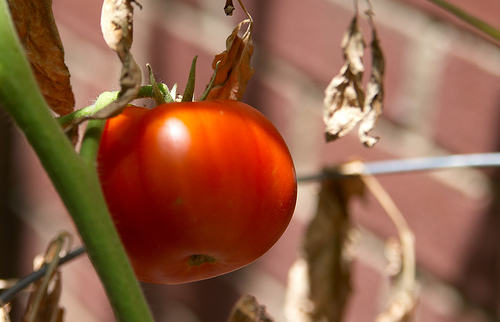

In [29]:
ripe_tom = list(data_path.glob('ripe/*.jpg'))
PIL.Image.open(str(ripe_tom[5]))

In [24]:
unripe_tom = list(data_path.glob('unripe/*.jpg'))
unripe_tom[:5]

[WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_1.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_10.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_100.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_101.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_102.jpg')]

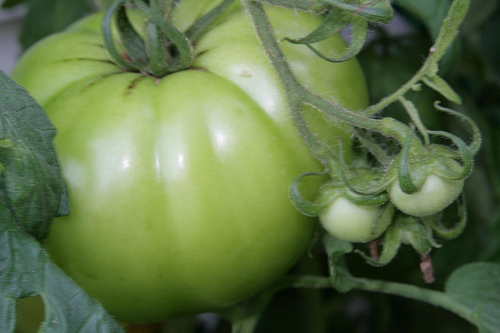

In [30]:
unripe_tom = list(data_path.glob('unripe/*.jpg'))
PIL.Image.open(str(unripe_tom[5]))

In [8]:
tom_dic = {
    'ripe' : list(data_path.glob('ripe/*.jpg')),
    'unripe' : list(data_path.glob('unripe/*.jpg')),
}

In [40]:
print('ripe path')
print(tom_dic['ripe'][:3])
print('unripe path')
print(tom_dic['unripe'][:3])

ripe path
[WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_1.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_10.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_100.jpg')]
unripe path
[WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_1.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_10.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_100.jpg')]


In [9]:
label_dic = {
    'ripe' : 0,
    'unripe' : 1,
}

In [15]:
X, y = [], []

for tom_name, images in tom_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, (224, 224))
        X.append(resize_img)
        y.append(label_dic[tom_name])

In [32]:
X[5].shape

(224, 224, 3)

In [30]:
y[5]

0

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
print('X_train Samples=', len(X_train))
print('X_test Samples=', len(X_test))
print('y_train Samples=', len(y_train))
print('y_test  Samples=', len(y_test))

X_train Samples= 461
X_test Samples= 154
y_train Samples= 461
y_test  Samples= 154


In [18]:
X_train_scale = X_train / 255
X_test_scale = X_test / 255

In [60]:
num_classes = 2

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scale, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 9s 543ms/step - loss: 0.9652 - accuracy: 0.6030
Epoch 2/30
15/15 [==============================] - 7s 459ms/step - loss: 0.4469 - accuracy: 0.8048
Epoch 3/30
15/15 [==============================] - 7s 486ms/step - loss: 0.3775 - accuracy: 0.8308
Epoch 4/30
15/15 [==============================] - 8s 508ms/step - loss: 0.3199 - accuracy: 0.8698
Epoch 5/30
15/15 [==============================] - 7s 497ms/step - loss: 0.2986 - accuracy: 0.8742
Epoch 6/30
15/15 [==============================] - 8s 502ms/step - loss: 0.3123 - accuracy: 0.8590
Epoch 7/30
15/15 [==============================] - 8s 513ms/step - loss: 0.2528 - accuracy: 0.9002
Epoch 8/30
15/15 [==============================] - 8s 498ms/step - loss: 0.2094 - accuracy: 0.9111
Epoch 9/30
15/15 [==============================] - 8s 560ms/step - loss: 0.1587 - accuracy: 0.9414
Epoch 10/30
15/15 [==============================] - 8s 513ms/step - loss: 0.1688 - accuracy: 0.9349

In [63]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 1s 139ms/step - loss: 222.8799 - accuracy: 0.7857


[222.87985229492188, 0.7857142686843872]

In [73]:
augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(
        "horizontal",
        input_shape=(180, 180, 3)
    ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [74]:
num_classes = 2

model = Sequential([
    augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    layers.Dropout(0.2),
    layers.Flatten(),
    
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scale, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 9s 534ms/step - loss: 0.5613 - accuracy: 0.7093
Epoch 2/30
15/15 [==============================] - 8s 523ms/step - loss: 0.3872 - accuracy: 0.8460
Epoch 3/30
15/15 [==============================] - 8s 536ms/step - loss: 0.2979 - accuracy: 0.8894
Epoch 4/30
15/15 [==============================] - 9s 582ms/step - loss: 0.3467 - accuracy: 0.8590
Epoch 5/30
15/15 [==============================] - 9s 578ms/step - loss: 0.2835 - accuracy: 0.8785
Epoch 6/30
15/15 [==============================] - 9s 575ms/step - loss: 0.2475 - accuracy: 0.8959
Epoch 7/30
15/15 [==============================] - 9s 574ms/step - loss: 0.2465 - accuracy: 0.8980
Epoch 8/30
15/15 [==============================] - 9s 587ms/step - loss: 0.2287 - accuracy: 0.9002
Epoch 9/30
15/15 [==============================] - 9s 582ms/step - loss: 0.2226 - accuracy: 0.9067
Epoch 10/30
15/15 [==============================] - 8s 552ms/step - loss: 0.2240 - accuracy: 0.9111

In [76]:
model.evaluate(X_test_scale, y_test)

5/5 [==============================] - 1s 105ms/step - loss: 0.4296 - accuracy: 0.8182


[0.4296325147151947, 0.8181818127632141]

In [21]:
IMAGE_SHAPE = (224, 224)
classifier = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
softmax_only = tensorflow_hub.KerasLayer(
    classifier, input_shape=IMAGE_SHAPE+(3,), trainable=False
)

In [22]:
num_classes = 2

model = tf.keras.Sequential([
    softmax_only,
    tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              23561152  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,565,250
Trainable params: 4,098
Non-trainable params: 23,561,152
_________________________________________________________________


In [26]:
model.compile(
    optimizer = "adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scale, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 46s 3s/step - loss: 0.2317 - acc: 0.9132
Epoch 2/30
15/15 [==============================] - 47s 3s/step - loss: 0.1751 - acc: 0.9284
Epoch 3/30
15/15 [==============================] - 50s 3s/step - loss: 0.1536 - acc: 0.9436
Epoch 4/30
15/15 [==============================] - 38s 2s/step - loss: 0.1433 - acc: 0.9544
Epoch 5/30
15/15 [==============================] - 38s 3s/step - loss: 0.1263 - acc: 0.9610
Epoch 6/30
15/15 [==============================] - 43s 3s/step - loss: 0.1188 - acc: 0.9696
Epoch 7/30
15/15 [==============================] - 40s 3s/step - loss: 0.1060 - acc: 0.9653
Epoch 8/30
15/15 [==============================] - 42s 3s/step - loss: 0.1030 - acc: 0.9718
Epoch 9/30
15/15 [==============================] - 46s 3s/step - loss: 0.0950 - acc: 0.9740
Epoch 10/30
15/15 [==============================] - 47s 3s/step - loss: 0.0890 - acc: 0.9718
Epoch 11/30
15/15 [==============================] - 42s 3s/step - lo

In [27]:
model.evaluate(X_test_scale, y_test)

5/5 [==============================] - 19s 3s/step - loss: 0.5178 - acc: 0.8182


[0.5177547335624695, 0.8181818127632141]